<a href="https://colab.research.google.com/github/georgeputhean/Hobby-Projects/blob/main/RiskSpanSkillAssesmentPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

#uploading files required
uploaded = files.upload()

Saving RiskSpanSkillsAssessment.xlsx to RiskSpanSkillsAssessment.xlsx


In [20]:
#converting the uploaded Excel file into a Dataframe and selecting the sheet Data
df=pd.read_excel("/content/RiskSpanSkillsAssessment.xlsx",sheet_name="Data")

In [21]:
#display all columns
df.columns

Index(['LOAN_NUMBER', 'SAMPLE_DATE', 'FILE_REQ_DATE', 'SECOND_REQUEST_DATE',
       'SENT_TO_IMAGING_DATE', 'LENDER_RESPONSE_DUE_DATE',
       'DATE_LOAN_FINALIZED', 'LENDER_ID', 'LENDER_NAME', 'LENDER_LOAN_ID',
       'PROP_STATE', 'NEW_CONSTRUCTION_INDICATOR', 'CONDOMINIUM_INDICATOR',
       'LOAN_ORIG_DATE', 'CURRENT_BALANCE', 'FICO_SCORE', 'LTV', 'ORIG_VALUE',
       'AVM_VALUE', 'FIELD_REVIEW_VALUE_SUPPORTED', 'FIELD_REVIEW_VALUE',
       'PURPOSE_CODE', 'OCCUPANCY_CODE', 'LENDER_INST_TYPE_DESCRIPTION',
       'UNDERWRITER_NAME', 'REVIEW_DATE', 'REVIEW_STATUS', 'DEAL_NAME',
       'START_DATE'],
      dtype='object')

Q1

In [22]:
#creating an all aggregation columns
df_InstType=df.groupby('LENDER_INST_TYPE_DESCRIPTION').agg( Loan_Count=('LOAN_NUMBER', np.count_nonzero),
                                                Average_Current_Balance=('CURRENT_BALANCE', np.mean),
                                                Max_Current_Balance=('CURRENT_BALANCE', np.max),
                                               Min_Current_Balance=('CURRENT_BALANCE', np.min)).round(2)
#creating a grand total row at the end
df_InstType.loc['Total']= df_InstType.sum(numeric_only=True, axis=0)
df_InstType

,Loan_Count,Average_Current_Balance,Max_Current_Balance,Min_Current_Balance
LENDER_INST_TYPE_DESCRIPTION,,,,
Bank Owned Mortgage Company - National,187.0,242899.80,720000.0,43225.0
Community Banks,499.0,211839.96,729750.0,28500.0
Credit Unions,374.0,175149.60,578250.0,22500.0
Mortgage Banker - (Large),279.0,260374.38,729750.0,59000.0
Mortgage Banker - Bank Owned,661.0,236262.69,625500.0,25018.0
Total,2000.0,1126526.43,3383250.0,178243.0


REPORT 2: Data by LTV (Loan to Value) Cohorts

In [23]:
#creating bins for LTV
def ltv_binning(value):
    if value > 95.00:
        return "> 95%"
    if 90 < value <= 95:
        return ">90% and <= 95%"
    elif 85 < value <= 90:
        return ">85% and <= 90%"
    elif value <= 85:
        return "<= 85%"
 
 #creating a new column LTV cohorts for LTV
df['LTV_COHORTS'] = df['LTV'].map(ltv_binning)

In [36]:
#creating an all aggregation columns on LTV cohorts
df_LTV_cohort=df.groupby('LTV_COHORTS').agg( Loan_Count=('LOAN_NUMBER', np.count_nonzero),
                                                Average_Current_Balance=('CURRENT_BALANCE', np.mean),
                                                Max_Current_Balance=('CURRENT_BALANCE', np.max),
                                               Min_Current_Balance=('CURRENT_BALANCE', np.min)).round(2)
#creating a grand total row at the end
df_LTV_cohort.loc['Total']= df_LTV_cohort.sum(numeric_only=True, axis=0)
df_LTV_cohort

,Loan_Count,Average_Current_Balance,Max_Current_Balance,Min_Current_Balance
LTV_COHORTS,,,,
<= 85%,344.0,223985.91,729750.0,43300.0
> 95%,37.0,200910.19,371510.0,65475.0
>85% and <= 90%,823.0,235966.18,729750.0,22500.0
>90% and <= 95%,796.0,209504.34,561700.0,28500.0
Total,2000.0,870366.62,2392710.0,159775.0


**REPORT 3: Data by Loan Age Cohort (Loan Age = 6/1/2013 minus LOAN_ORIG_DATE in months)**

In [26]:
#differnce in month between two dates start date has all rows as 6/1/2013 reusing the column
df['LOAN_AGE'] = ((df['START_DATE'] - df['LOAN_ORIG_DATE'])/np.timedelta64(1, 'M'))

In [27]:
#creating bins for loan age
def loan_age_binning(value):
    if value >= 40.00:
        return ">= 40 Months"
    if 30 <= value < 40:
        return "30 - 39 Months"
    elif 20 <= value < 30:
        return "20 - 29 Months"
    elif 10 <= value < 20:
        return "10 - 19 Months"
    elif 0 <= value < 10:
        return "0 - 9 Months"
    else:
        return "Unknown"
# creating a new column  loan age cohorts based on loan age
df['LOAN_AGE_COHORTS'] = df['LOAN_AGE'].map(loan_age_binning)

In [28]:
#creating an all aggregation columns on LTV cohorts
df_LAG_cohort=df.groupby('LOAN_AGE_COHORTS').agg( Loan_Count=('LOAN_NUMBER', np.count_nonzero),
                                                Average_Current_Balance=('CURRENT_BALANCE', np.mean),
                                                Max_Current_Balance=('CURRENT_BALANCE', np.max),
                                               Min_Current_Balance=('CURRENT_BALANCE', np.min)).round(2)
#creating a grand total row at the end
df_LAG_cohort.loc['Total']= df_LAG_cohort.sum(numeric_only=True, axis=0)
df_LAG_cohort

,Loan_Count,Average_Current_Balance,Max_Current_Balance,Min_Current_Balance
LOAN_AGE_COHORTS,,,,
0 - 9 Months,328.0,233366.13,562500.0,45000.0
10 - 19 Months,736.0,228903.45,720000.0,25018.0
20 - 29 Months,532.0,211479.35,729750.0,22500.0
30 - 39 Months,232.0,207759.00,665100.0,35000.0
>= 40 Months,156.0,228355.87,729750.0,42750.0
Unknown,16.0,256425.31,404700.0,88065.0
Total,2000.0,1366289.11,3811800.0,258333.0


REPORT 4: Create a Crosstab Report- SUM of CURRENT_UPB by LTV Cohorts and FICO Cohorts

In [29]:
#creating bins for fico score
def fico_binning(value):
    if value >= 800:
        return ">=800"
    if 700 <= value < 800:
        return "700 - 799"
    elif 600 <= value < 700:
        return "600 - 699"
    elif value < 600:
        return "<600"
#creating a new columns based on the fico score
df['FICO_COHORTS'] = df['FICO_SCORE'].map(fico_binning)

In [37]:
#creating a cross tab for fico cohorts and ltv cohorts 
df_LTV_FICO=pd.crosstab(df['FICO_COHORTS'], df['LTV_COHORTS'], values=df['CURRENT_BALANCE'], aggfunc='sum').round(2)
df_LTV_FICO

LTV_COHORTS,<= 85%,> 95%,>85% and <= 90%,>90% and <= 95%
FICO_COHORTS,,,,
600 - 699,3260490.0,629990.0,14606019.0,14598016.0
700 - 799,60413630.0,5359114.0,149979009.0,135188314.0
<600,NaN,NaN,247050.0,NaN
>=800,13377034.0,1444573.0,29368087.0,16979121.0


REPORT 5: Create a bar graph in your statistical program of Report 4: SUM of CURRENT_UPB by LTV Cohorts and FICO Cohorts and paste an image below.

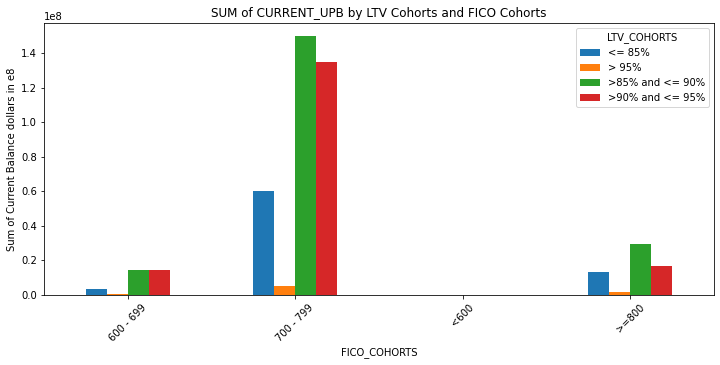

In [33]:
# Creating barplot using the cross tab
ax=df_LTV_FICO.plot.bar(rot=45,figsize=(12,5))
plt.ylabel("Sum of Current Balance dollars in e8")
plt.ticklabel_format(axis='y',style='sci')
plt.title("SUM of CURRENT_UPB by LTV Cohorts and FICO Cohorts")
plt.show()


Create a CSV file of the final dataframe

In [34]:
# creating a new csv file
df.to_csv("Final Dataframe.csv",index=False)

In [38]:
# Created by George Puthean for Risk Span Assesment